In [1]:
from single_trajectory_data import SinTrajectory, SpiralTrajectory, LorenzTrajectory
from shooting_model import SingleShooting
import matplotlib.pyplot as plt
from math import pi

tensor(200)

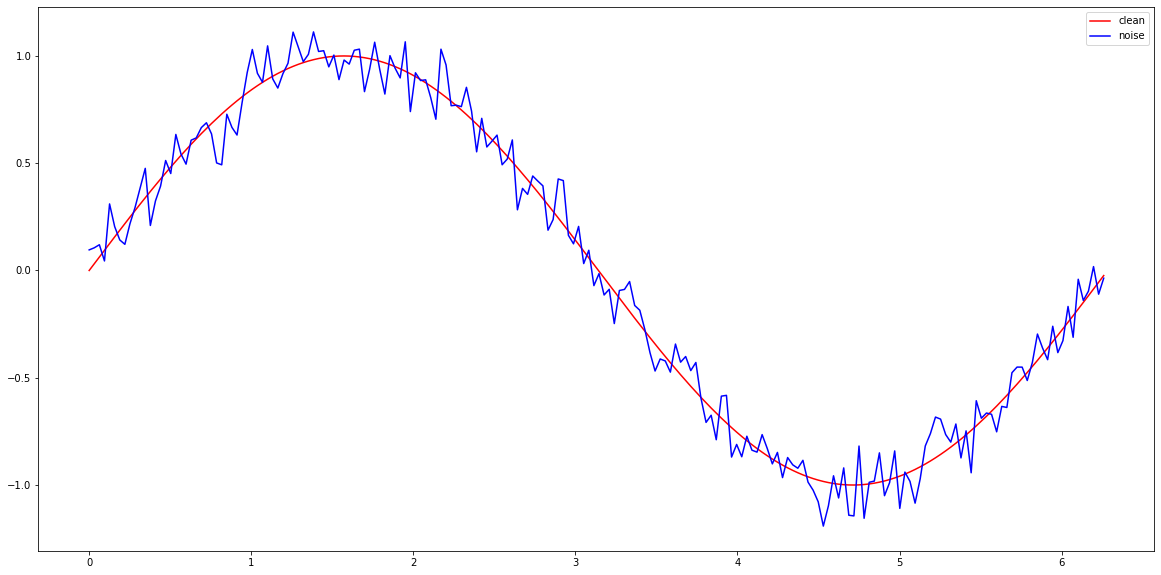

In [2]:
t, y_clean, y = SinTrajectory(0.1)()
plt.figure(figsize=(20, 10))
T = (t <= 2*pi).sum()
plt.plot(t[:T], y_clean[0, :T], c='r', label='clean')
plt.plot(t[:T], y[0, :T], c='b', label='noise')
plt.legend()
T

In [3]:
t, y_clean, y = SpiralTrajectory(0.1, (0,))()
t.shape, y_clean.shape, y.shape

(torch.Size([5000]), torch.Size([1, 5000]), torch.Size([1, 5000]))

tensor(200)

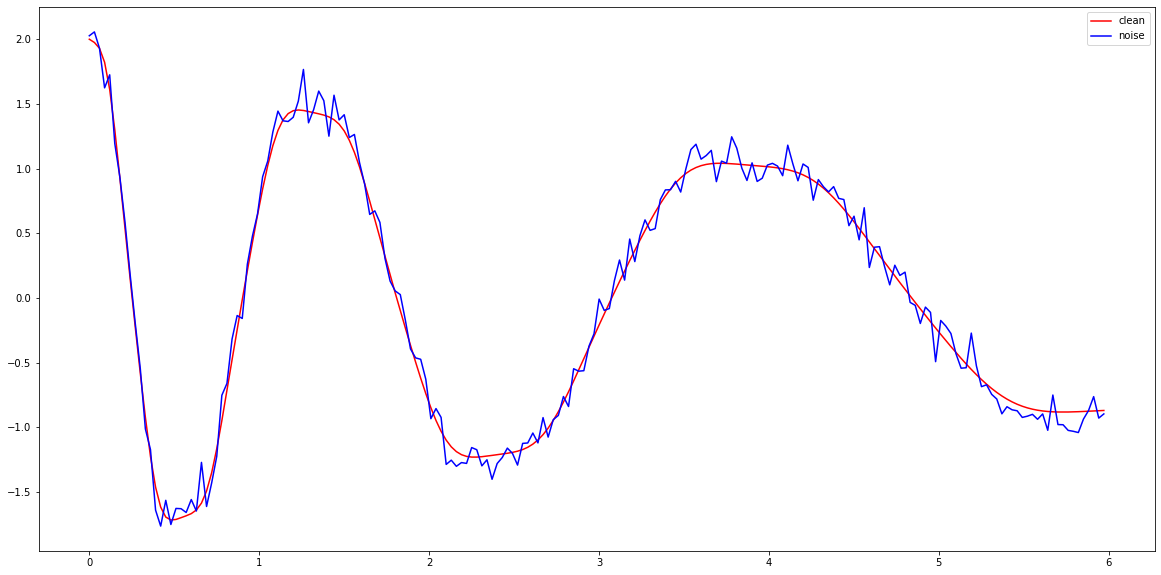

In [4]:
plt.figure(figsize=(20, 10))
T = (t <= 6).sum()
dim = 0
plt.plot(t[:T], y_clean[dim, :T], c='r', label='clean')
plt.plot(t[:T], y[dim, :T], c='b', label='noise')
plt.legend()
T

In [30]:
trajectory = LorenzTrajectory(1, (0,2))
t, y_clean, y = trajectory()
t.shape, y_clean.shape, y.shape

(torch.Size([4000]), torch.Size([2, 4000]), torch.Size([2, 4000]))

tensor(400)

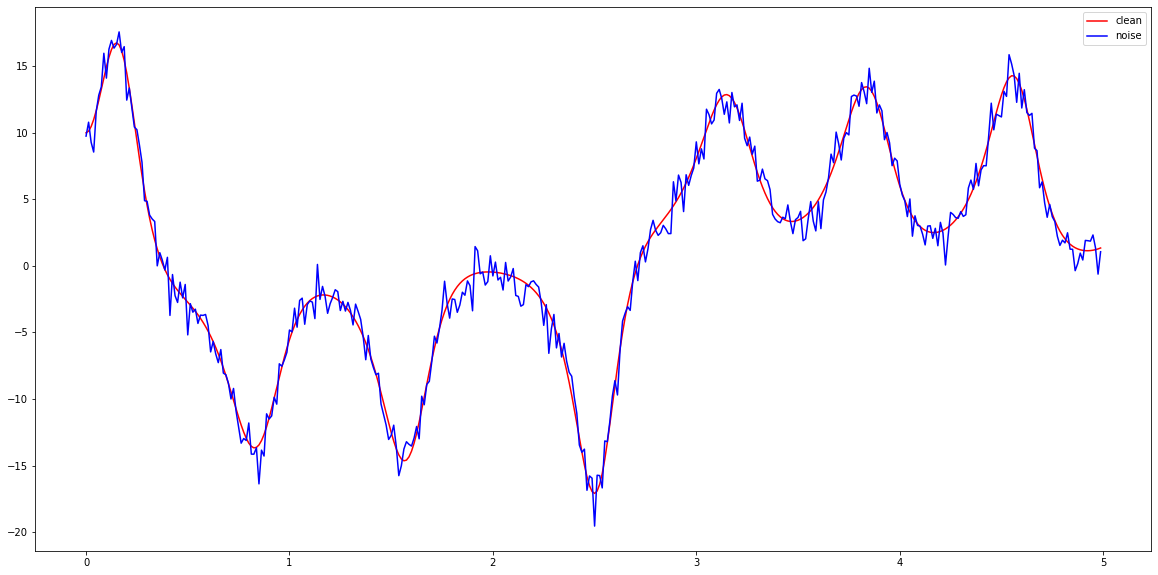

In [6]:
plt.figure(figsize=(20, 10))
T = (t <= 5).sum()
dim = 0
plt.plot(t[:T], y_clean[dim, :T], c='r', label='clean')
plt.plot(t[:T], y[dim, :T], c='b', label='noise')
plt.legend()
T

In [31]:
T_train = 6

N = (t <= T_train).sum()
t_train, t_test = t[:N], t[N:]
y_clean_train, y_clean_test = y_clean[:, :N], y_clean[:, N:]
y_train, y_test = y[:, :N], y[:, N:]

In [16]:
model = SingleShooting(2)
y_pred = model(t_train, y_train)[0]
table = trajectory.log_prediction_results(model, t_train, y_clean_train, y_train, y_pred, t_test, y_clean_test, y_test)

          t description          y stage
0  0.000000  y_clean_y0  10.000000  test
1  0.012503  y_clean_y0  10.124796  test
2  0.025006  y_clean_y0  10.469546  test
3  0.037509  y_clean_y0  10.994062  test
4  0.050013  y_clean_y0  11.661130  test


In [17]:
table.data

[[0.0, 'y_clean_y0', 10.0, 'test', 'clean', 'y0'],
 [0.012503126, 'y_clean_y0', 10.124796, 'test', 'clean', 'y0'],
 [0.025006251, 'y_clean_y0', 10.469546, 'test', 'clean', 'y0'],
 [0.037509378, 'y_clean_y0', 10.994062, 'test', 'clean', 'y0'],
 [0.050012503, 'y_clean_y0', 11.66113, 'test', 'clean', 'y0'],
 [0.06251563, 'y_clean_y0', 12.433123, 'test', 'clean', 'y0'],
 [0.075018756, 'y_clean_y0', 13.269288, 'test', 'clean', 'y0'],
 [0.08752188, 'y_clean_y0', 14.123766, 'test', 'clean', 'y0'],
 [0.100025006, 'y_clean_y0', 14.944687, 'test', 'clean', 'y0'],
 [0.11252813, 'y_clean_y0', 15.675199, 'test', 'clean', 'y0'],
 [0.12503126, 'y_clean_y0', 16.256498, 'test', 'clean', 'y0'],
 [0.13753438, 'y_clean_y0', 16.632904, 'test', 'clean', 'y0'],
 [0.15003751, 'y_clean_y0', 16.758677, 'test', 'clean', 'y0'],
 [0.16254064, 'y_clean_y0', 16.60441, 'test', 'clean', 'y0'],
 [0.17504376, 'y_clean_y0', 16.162184, 'test', 'clean', 'y0'],
 [0.18754688, 'y_clean_y0', 15.447028, 'test', 'clean', 'y0'],


In [36]:
import pandas as pd
import numpy as np
data = pd.DataFrame(np.concatenate([t.numpy().reshape(-1, 1), y_clean.numpy().T, y.numpy().T], axis=1), columns=['t', 'y_clean_x1', 'y_clean_x2', 'y_noisy_x1', 'y_noisy_x2'])
data

,t,y_clean_x1,y_clean_x2,y_noisy_x1,y_noisy_x2
0,0.000000,10.000000,10.000000,11.438065,11.281763
1,0.012503,10.124796,11.036461,9.486470,10.869632
2,0.025006,10.469546,12.324333,10.751451,11.590866
3,0.037509,10.994062,13.887753,11.065724,15.858113
4,0.050013,11.661130,15.751984,12.518429,15.742517
...,...,...,...,...,...
3995,49.949989,-9.961344,18.952404,-9.033874,19.826267
3996,49.962490,-10.740633,20.442823,-10.551274,20.489384
3997,49.974995,-11.522089,22.153313,-11.868376,24.106712
3998,49.987499,-12.283772,24.062944,-13.413627,24.716143


In [37]:
table = pd.melt(data, id_vars=['t'], value_name='y')
table['type'] = table['variable'].str.split('_').str[1]
table['variable'] = table['variable'].str.split('_').str[2]
table

,t,variable,y,type
0,0.000000,x1,10.000000,clean
1,0.012503,x1,10.124796,clean
2,0.025006,x1,10.469546,clean
3,0.037509,x1,10.994062,clean
4,0.050013,x1,11.661130,clean
...,...,...,...,...
15995,49.949989,x2,19.826267,noisy
15996,49.962490,x2,20.489384,noisy
15997,49.974995,x2,24.106712,noisy
15998,49.987499,x2,24.716143,noisy


In [38]:
pd.pivot_table(table, values='y', index=['t', 'type'], columns=['variable']).reset_index()

variable,t,type,x1,x2
0,0.000000,clean,10.000000,10.000000
1,0.000000,noisy,11.438065,11.281763
2,0.012503,clean,10.124796,11.036461
3,0.012503,noisy,9.486470,10.869632
4,0.025006,clean,10.469546,12.324333
...,...,...,...,...
7995,49.974995,noisy,-11.868376,24.106712
7996,49.987499,clean,-12.283772,24.062944
7997,49.987499,noisy,-13.413627,24.716143
7998,50.000000,clean,-12.999063,26.130754
